In [8]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Importing the required modules

import edge_detection_MN_ver3 as ed2

In [10]:
frames = ed2.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')

In [11]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[35:85,40:120])

In [12]:
labeled_samples = ed2.edge_detection(crop_frame,9, method='sobel', track=True)

In [13]:
ed2.regprop(labeled_samples,crop_frame,3,3)

this is picture number: 0
sample: 2 26 38 30453.03846153846 30542.63157894737
sample: 3 32 49 30433.15625 30526.122448979593
sample: 1 19 37 30479.63157894737 30541.054054054053
sample: 4 23 26 30406.0 30519.23076923077
sample: 5 32 40 30377.59375 30509.05
sample: 6 25 39 30444.56 30539.615384615383
sample: 7 36 45 30417.11111111111 30527.933333333334
sample: 8 29 35 30452.48275862069 30546.314285714285
sample: 9 26 38 30399.615384615383 30517.157894736843
this is picture number: 1
sample: 1 20 36 30483.45 30543.222222222223
sample: 2 26 38 30452.76923076923 30544.473684210527
sample: 3 29 43 30438.241379310344 30517.3488372093
sample: 4 22 27 30401.772727272728 30520.703703703704
sample: 5 31 41 30376.612903225807 30512.90243902439
sample: 6 25 31 30448.04 30543.74193548387
sample: 7 36 45 30417.61111111111 30530.022222222222
sample: 8 28 36 30454.428571428572 30549.527777777777
sample: 9 27 37 30408.0 30521.0
this is picture number: 2
sample: 2 25 31 30461.36 30551.032258064515
sampl

## PART A:
### The temperature profile of the samples and plate is determined by detecting the edges, filling and labeling them, and monitoring the temperature at their centroids.

#### Use the function 'edge_detection.input_file' to load the input file

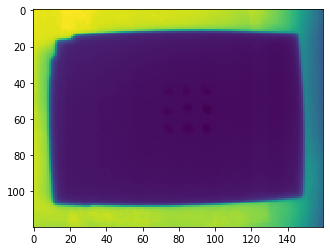

In [3]:
frames = ed2.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
plt.imshow(frames[0])

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

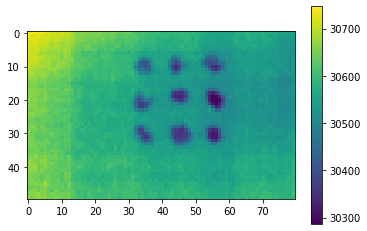

In [4]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[35:85,40:120])
plt.imshow(crop_frame[0])
plt.colorbar()

In [5]:
len(crop_frame)

887

#### Use the wrapping function edge_detection.inflection_temp 

In [6]:
labeled_samples = ed2.edge_detection(crop_frame,9, method='sobel', track=True)

In [ ]:
plt.imshow(labeled_samples[3])

In [ ]:
len(labeled_samples.shape)

In [ ]:
labeled_samples.flatten().tolist().count(1)

In [ ]:
from skimage.measure import regionprops

In [ ]:
len(regionprops(labeled_samples, intensity_image=crop_frame[0]))

In [ ]:
from skimage.measure import regionprops

In [ ]:
def regprop(labeled_samples, frames, n_rows, n_columns):     
    for i in range(len(frames)):
        if len(labeled_samples.shape) is 3:
            props = regionprops(labeled_samples[i], intensity_image=frames[i])
        elif len(labeled_samples.shape) is 2:
            props = regionprops(labeled_samples, intensity_image=frames[i])
        else:
            raise ValueError('Invalid labeled samples dimension')
            
        number_of_sample = len(set(labeled_samples[i].flatten()))-1
        
        #This part is for revising the wrong label order
        ppo = regionprops(labeled_samples[1], intensity_image=frames[1])
        for ma in range(number_of_sample):
            yoyo1_yc = ppo[ma].centroid[0]
            yoyo1_xc = ppo[ma].centroid[1]
            for sample in range(number_of_sample):
                if abs(regionprops(labeled_samples[i], intensity_image=frames[i])[sample].centroid[0]-yoyo1_yc)<2:
                    if abs(regionprops(labeled_samples[i], intensity_image=frames[i])[sample].centroid[1]-yoyo1_xc)<2:
                        
                        find_number = labeled_samples[i][int(ppo[sample].centroid[0])][int(ppo[sample].centroid[1])]
                        #This part is for calculating the area size of the samples
                        sample_area = labeled_samples[i].flatten().tolist().count(find_number)
                
                        #This part is for getting the range of the crop rectangle
                        loc_index = np.argwhere(labeled_samples[i]==(find_number))
                        left_side_column = min(loc_index[:,0])-1
                        right_side_column = max(loc_index[:,0])+1
                        left_side_row = min(loc_index[:,1])-1
                        right_side_row = max(loc_index[:,1])+1
   
                        #This part is for gettng the total temp and then get the average temp in each samples
                        sample_temp = []
                        for loc_index_len in range(len(loc_index)) :
                            x_coordinate = loc_index[loc_index_len].tolist()[0]
                            y_coordinate = loc_index[loc_index_len].tolist()[1]
            
                            result=frames[i][x_coordinate][y_coordinate]
                            sample_temp.append(result)
                        sum_temp_sample = np.sum(sample_temp)
                        intensity = sum_temp_sample/sample_area

                        #This part is getting the environment temperature
                        envir_area = (right_side_column-left_side_column+1)*(right_side_row-left_side_row+1)-sample_area
    
                        #First, get the total temperature in the range crop rectangle
                        total_rectangle_temp_list = []
                        for j in range(right_side_column-left_side_column+1):
                            for k in range(right_side_row-left_side_row+1):
                                crop_temp = frames[i][left_side_column+j][left_side_row+k]
                                total_rectangle_temp_list.append(crop_temp)
                
                        #Next, use the result from the last step to minus the sum_temp_sample, and you can get the sum_temp_envir
                        total_rectangle_temp = np.sum(total_rectangle_temp_list)
                        sum_temp_envir = total_rectangle_temp - sum_temp_sample
                        plate = sum_temp_envir/envir_area
                        
            
                        print("sample:",sample+1,sample_area,envir_area,intensity,plate)
        print("this is picture number:",i)   
       
    
        
         
''' 
        try:
            regprops[i] = pd.DataFrame({'Row': row, 'Column': column,
                                        'Plate_temp(cK)': plate,
                                        'Radius': radius,
                                        'Plate_coord': plate_coord,
                                        'Area': sample_area, 'Perim': perim,
                                        'Sample_temp(cK)': intensity,
                                        'unique_index': unique_index},
                                    dtype=np.float64)
        
        
        except ValueError:
            print('Wrong number of samples are being detected in frame %d' % i)
            continue

        if len(regprops[i]) != n_samples:
            print('Wrong number of samples are being detected in frame %d' % i)
        regprops[i].sort_values(['Column', 'Row'], inplace=True)
'''
'''
    return regprops
'''    

In [ ]:
ed2.regprop(labeled_samples,crop_frame,3,3)

In [ ]:
props = regionprops(labeled_samples[1], intensity_image=crop_frame[1])
for ma in range(9):
    yoyo1_yc = props[ma].centroid[0]
    yoyo1_xc = props[ma].centroid[1]
    for toop in range(9):
        if abs(regionprops(labeled_samples[700], intensity_image=crop_frame[700])[toop].centroid[0]-yoyo1_yc)<2:
            if abs(regionprops(labeled_samples[700], intensity_image=crop_frame[700])[toop].centroid[1]-yoyo1_xc)<2:
                print(toop,"result=",labeled_samples[700][int(props[toop].centroid[0])][int(props[toop].centroid[1])],
                      "is sample",toop+1)

In [ ]:
props = regionprops(labeled_samples[1], intensity_image=crop_frame[1])
for data in range(9):
    print(props[data].centroid)

#### Plotting the locations at which the temperature was recorded

In [ ]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(flip_frames[0])
plt.scatter(sorted_regprops[0]['Plate_coord'],sorted_regprops[0]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[0]['Column'],sorted_regprops[0]['Row'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

In [ ]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(p_temp[5],s_temp[5])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')

## Part B:
* The temperature profile of the samples and the plate is obtained by summing the pixel values over individual rows and columns, finding the troughs in the array of all the column and row sums.
* The temperature profile is then obtained by monitoring the temperature value at the intersection of peak values in the column and row sums. 

#### Load the input file as frames

#### Use the function irtemp.pixel_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video.

In [ ]:
m_df = pa.pixel_temp(crop_frame,len(crop_frame),n_columns = 3, n_rows = 3)